# TITANIC Machine Learning - KAGGLE solution

This is my first Kaggle Solution submit!

#### Project Description

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

##### Project Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

##### Overview

STEPS INVOLVED - 

    1. Importing Files
    2. Reading Datasets
    3. Data Understanding (Train and Test)
    4. Relationship Between Features and Survival
    5. EDA - Univariate Analysis and Bivariate Analysis
    6. Feature Engineering (Extraction and Selection)
    7. Classification and Evaluation - Model Classification, Model Accuracy and Confusion Matrix
    8. Comparing Models
    9. Create submission file to Kaggle

Let's Begin!

## 1. Importing Libraries

In [123]:
#linear algebra and pandas
import numpy as np, pandas as pd

#plotting
import seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

#setting seaborns default for plots
sns.set()

#for rescaling and splitting
from sklearn.preprocessing import scale

#sci-kit learn libraries for model classification
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

#os
import os

#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#setting 50 rows & columns to show in the output clearly

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

## 2. Reading Datasets

In [3]:
#reading files
train_data = pd.read_csv(r'C:\Users\acer\OneDrive\Desktop\titanic\train.csv')
test_data = pd.read_csv(r'C:\Users\acer\OneDrive\Desktop\titanic\test.csv')

In [4]:
#train head
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
#test head
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


A brief information about the columns in the dataset:

    1. PassengerID -> An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.
    2. Survived -> Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.
    3. Pclass -> Ticket Class. 1 stands for First class ticket, 2 stands for Second class ticket, and 3 stands for Third class ticket.
    4. Name -> Passenger's name. Name also contain title. "Mr" for man, "Mrs" for woman, "Miss" for girl, "Master" for boy, and so on.
    5. Sex -> Passenger's sex. It's either male or female.
    6. Age -> Passenger's age. NaN values in the column means the age hasn't been recorded.
    7. SibSp -> Number of siblings or spouses travelling with each passenger.
    8. Parch -> Number of parents of children travelling with each passenger.
    9. Ticket -> Ticket Number.
    10. Fare -> How much money the passenger has paid for the travel journey.
    11. Cabin -> Cabin Number of the passenger. "NaN" values here means that the cabin number of that particular passenger hasn't been recorded.
    12. Embarked -> Port from where the particular passenger was boarded/embarked.

## 3. Data Understanding

### Train Data

In [6]:
train_data.shape

(891, 12)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#null values on percentage wise
nulltrain = round(100*(train_data.isnull().sum()/len(train_data.index)), 2)

#taking 50% on majority of NaN values in the column
nulltrain.loc[nulltrain>0]

Age         19.87
Cabin       77.10
Embarked     0.22
dtype: float64

### Test Data

In [13]:
test_data.shape

(418, 11)

In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [15]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [18]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
#null values on percentage wise
nulltest = round(100*(test_data.isnull().sum()/len(test_data.index)), 2)

#taking 50% on majority of NaN values in the column
nulltest.loc[nulltest>0]

Age      20.57
Fare      0.24
Cabin    78.23
dtype: float64

Points To be Noted - 

    1. Age and Cabin columns have some missing values in the train_data.
    2. Age and Cabin columns also have some missing values in the test_data.
    3. Survived column is not present in the test_data.
    4. We need to predict based on the 'Survived' column in the test data.
    5. Cabin column has more than 70% null values, but we can not delete the column before feature engineering, as we need to see how this feature react with the Survival data.

## 4. Relationship between Features and Survival

In [20]:
#survival value counts
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
#survived data
survived = train_data[train_data['Survived']==1]
print("Survived - ", len(survived))

#not survived data
dead = train_data[train_data['Survived']==0]
print("Dead - ", len(dead))

Survived -  342
Dead -  549


In [22]:
#percentage-wise
survived_percentage = (len(survived)/len(train_data))*100.0
print("Survived- ", float(survived_percentage))

dead_percentage = (len(dead)/len(train_data))*100.0
print("Dead- ", float(dead_percentage))

Survived-  38.38383838383838
Dead-  61.61616161616161


Survival Vs Sex

In [23]:
#SURVIVED
#male survived
male_survived = train_data[(train_data['Survived']==1)&(train_data['Sex']=='male')]

#female survived
female_survived = train_data[(train_data['Survived']==1)&(train_data['Sex']=='female')]

#DEAD
#male dead
male_dead = train_data[(train_data['Survived']==0)&(train_data['Sex']=='male')]

#female dead
female_dead = train_data[(train_data['Survived']==0)&(train_data['Sex']=='female')]

In [24]:
male_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
74,75,1,3,"Bing, Mr. Lee",male,32.00,0,0,1601,56.4958,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.00,0,0,345779,9.5000,NaN,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.00,0,1,PC 17759,63.3583,D10 D12,C


In [25]:
female_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [26]:
male_dead

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [27]:
female_dead

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C


In [147]:
print("Male Survived- ", len(male_survived))
print("Female Survived- ", len(female_survived))
print("\n")
print("Male Dead- ", len(male_dead))
print("Female Dead- ", len(female_dead))

Male Survived-  109
Female Survived-  233


Male Dead-  468
Female Dead-  81


These information says that, more number of males were not able to survived than females. As from the movie or the data provided online, we can explore that many females were first to use the emergency boats during the sinkage. Thus, there was 61% (approx.) death during this time and nearly 38% survived.

###### Data Preparation

In [28]:
#main dataframe
titanic_data = [train_data, test_data]

In [29]:
#separating the title from the name
for d in titanic_data:
    d['Title'] = d['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [30]:
#value count of train title
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Countess      1
Capt          1
Jonkheer      1
Lady          1
Mme           1
Ms            1
Sir           1
Name: Title, dtype: int64

In [31]:
#value count of test title
test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

##### Features Vs Survival

FEATURE - Sex

In [32]:
#value counts
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [33]:
#sex and survival
train_data.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [34]:
#mean value
train_data[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


These data says that 74% females were survived.

FEATURE - Pclass

In [35]:
#value counts
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [36]:
#Pclass and suvival
train_data.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [37]:
#mean value
train_data[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


From Pclass data, we come to know that third class ticket passengers were more to face the death than the first class ticket passengers. Survival of first class is nearly 74% than any other classes.

FEATURE - SibSp

In [38]:
#value counts
train_data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [39]:
#SibSp and suvival
train_data.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [40]:
#mean value
train_data[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


From SibSp data, we get to know about the siblings and spouses. With one/two siblings and spouses, are more likely to be survived. Plus, one with large number of siblings and spouses groups were not able to survived.

FEATURE - Embarked

In [41]:
#value counts
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
#Embarked and suvival
train_data.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [43]:
#mean value
train_data[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


The boarding columns are C, Q and S. The embarked/boarded passengers with these columns are stored for record. Here we can se that the C column passengers are having more number of survival.

FEATURE - Parch

In [44]:
#value counts
train_data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [45]:
#Parch and suvival
train_data.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [46]:
#mean value
train_data[['Parch','Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


Parch tells about number of parents of the children traveling in the ship. This data, as we can see, in the family if there are more than 3 children's parents than they are more likely to be dead.

FEATURE - Title

In [47]:
#value counts
train_data.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Countess      1
Capt          1
Jonkheer      1
Lady          1
Mme           1
Ms            1
Sir           1
Name: Title, dtype: int64

In [48]:
#Title and suvival
train_data.groupby('Title').Survived.value_counts()

Title     Survived
Capt      0             1
Col       0             1
          1             1
Countess  1             1
Don       0             1
Dr        0             4
          1             3
Jonkheer  0             1
Lady      1             1
Major     0             1
          1             1
Master    1            23
          0            17
Miss      1           127
          0            55
Mlle      1             2
Mme       1             1
Mr        0           436
          1            81
Mrs       1            99
          0            26
Ms        1             1
Rev       0             6
Sir       1             1
Name: Survived, dtype: int64

In [49]:
#mean value
train_data[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


Titles like Rev, Don, Jonkheer, and Capt were dead. As we know that, there were more females who survived, so titles like Miss, Mrs has more number of survival.

FEATURES - Pclass and Embarked

In [50]:
#Pclass and Embarked Vs Survival
tab1 = pd.crosstab(train_data['Pclass'], train_data['Embarked'])
print(tab1)

Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353


FEATURES - Sex and Embarked

In [51]:
#Sex and Embarked Vs Survival
tab2 = pd.crosstab(train_data['Sex'], train_data['Embarked'])
print(tab2)

Embarked   C   Q    S
Sex                  
female    73  36  203
male      95  41  441


FEATURES - SibSp and Embarked

In [52]:
#SibSp and Embarked Vs Survival
tab3 = pd.crosstab(train_data['SibSp'], train_data['Embarked'])
print(tab3)

Embarked    C   Q    S
SibSp                 
0         109  59  438
1          53  11  145
2           6   3   19
3           0   0   16
4           0   4   14
5           0   0    5
8           0   0    7


FEATURES - Pclass and Sex

In [53]:
#Pclass and Sex Vs Survival
tab4 = pd.crosstab(train_data['Pclass'], train_data['Sex'])
print(tab4)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


FEATURES - SibSp and Sex

In [54]:
#Sex and SibSp Vs Survival
tab5 = pd.crosstab(train_data['Sex'], train_data['SibSp'])
print(tab5)

SibSp     0    1   2   3   4  5  8
Sex                               
female  174  106  13  11   6  1  3
male    434  103  15   5  12  4  4


FEATURES - Pclass and SibSp

In [55]:
#Pclass and SibSp Vs Survival
tab6 = pd.crosstab(train_data['Pclass'], train_data['SibSp'])
print(tab6)

SibSp     0   1   2   3   4  5  8
Pclass                           
1       137  71   5   3   0  0  0
2       120  55   8   1   0  0  0
3       351  83  15  12  18  5  7


FEATURES - Parch and Sex

In [56]:
#Sex and Parch Vs Survival
tab7 = pd.crosstab(train_data['Sex'], train_data['Parch'])
print(tab7)

Parch     0   1   2  3  4  5  6
Sex                            
female  194  60  49  4  2  4  1
male    484  58  31  1  2  1  0


FEATURES - Parch and Pclass

In [57]:
#Pclass and Parch Vs Survival
tab8 = pd.crosstab(train_data['Pclass'], train_data['Parch'])
print(tab8)

Parch     0   1   2  3  4  5  6
Pclass                         
1       163  31  21  0  1  0  0
2       134  32  16  2  0  0  0
3       381  55  43  3  3  5  1


FEATURES - Parch and Embarked

In [58]:
#Embarked and Parch Vs Survival
tab9 = pd.crosstab(train_data['Embarked'], train_data['Parch'])
print(tab9)

Parch       0   1   2  3  4  5  6
Embarked                         
C         123  30  14  1  0  0  0
Q          69   6   1  0  0  1  0
S         484  82  65  4  4  4  1


This is how Pclass, Parch, Embarked, SibSp and Sex is related with the Survival. We have used the crosstab() from pandas to find the binary relationship between the features and Survival.

## 5. Exploratory Data Analysis (EDA)

#### Univariate Analysis

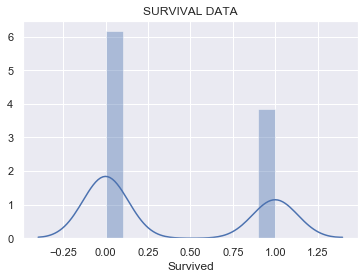

In [59]:
#plot - survived
plt.title('SURVIVAL DATA')

sns.distplot(train_data['Survived'], bins=10)
plt.show()

This shows there were more number of non-survival as the bar at 0.00 is high.

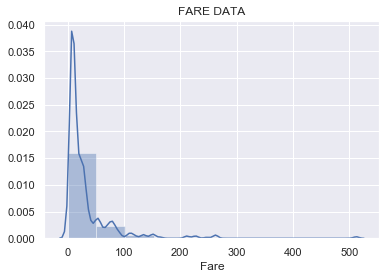

In [60]:
#plot - Fare
plt.title('FARE DATA')

sns.distplot(train_data['Fare'], bins=10)
plt.show()

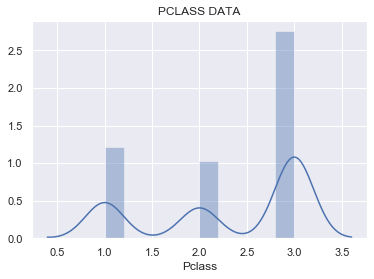

In [61]:
#plot - Pclass
plt.title('PCLASS DATA')

sns.distplot(train_data['Pclass'], bins=10)
plt.show()

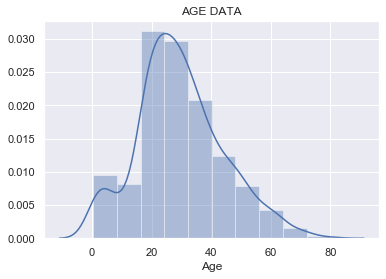

In [62]:
#plot - Age
plt.title('AGE DATA')

sns.distplot(train_data['Age'], bins=10)
plt.show()

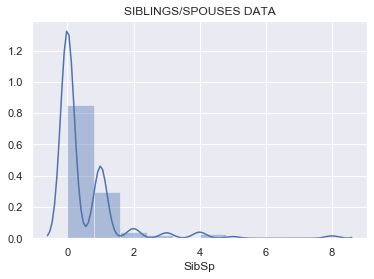

In [63]:
#plot - SibSp
plt.title('SIBLINGS/SPOUSES DATA')

sns.distplot(train_data['SibSp'], bins=10)
plt.show()

These were the univariate analysis, and now let's see the bivariate analysis.

#### Bivariate Analysis

In [64]:
#bar graph for bivariate
def bar_graph(col):
    s = survived[col].value_counts()
    d = dead[col].value_counts()
    
    barchart_df = pd.DataFrame([s, d])
    barchart_df.index = ['Survived','Dead']
    
    barchart_df.plot(figsize=(10,5), kind='bar', stacked=True)

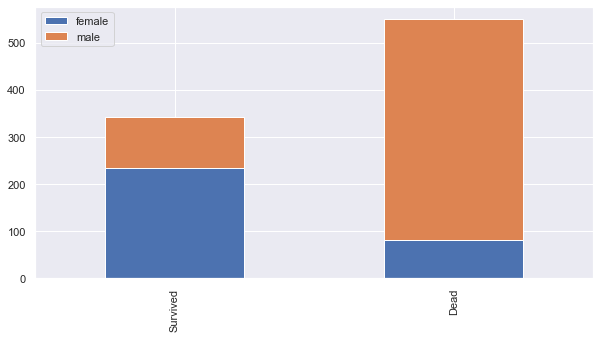

In [65]:
#sex feature
bar_graph('Sex')

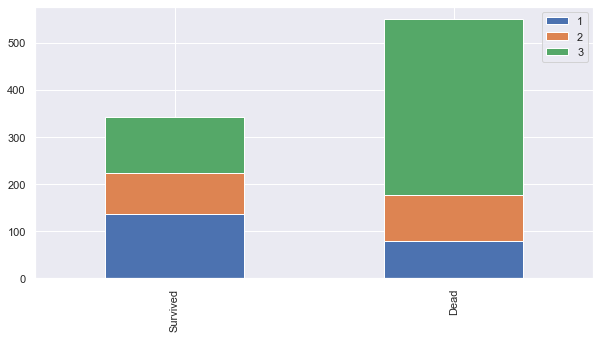

In [66]:
#pclass feature
bar_graph('Pclass')

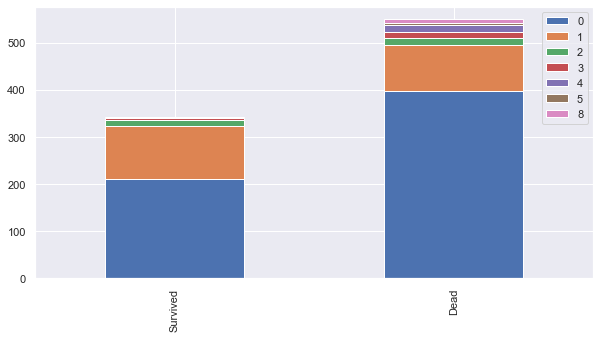

In [67]:
#sibsp feature
bar_graph('SibSp')

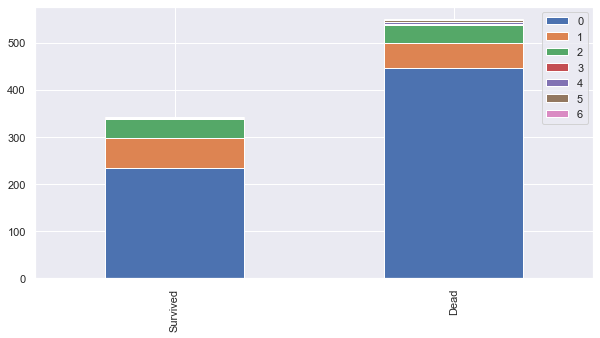

In [68]:
#parch feature
bar_graph('Parch')

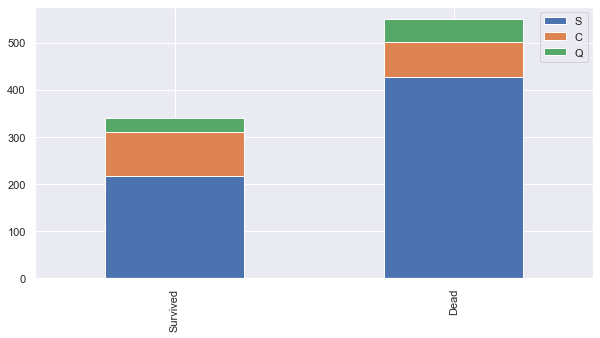

In [69]:
#embarked feature
bar_graph('Embarked')

#### Correlation Feature Matrix

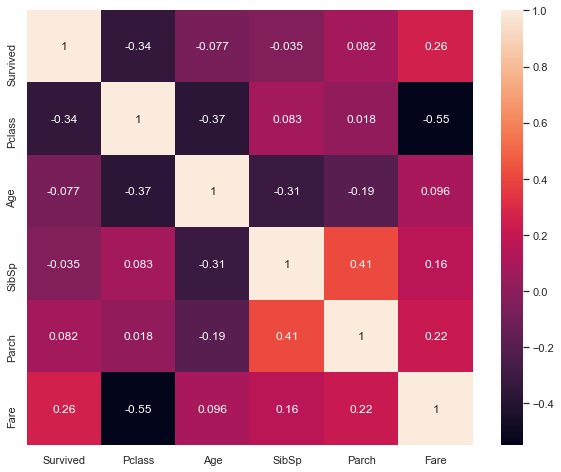

In [70]:
#figure size
plt.figure(figsize=(10,8))

#heatmap
sns.heatmap(train_data.drop('PassengerId', axis=1).corr(), annot=True)

## 6. Feature Engineering

Over here, we'll handle data cleaning (if required any) and data preparation process together feature by feature.

In [71]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [72]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


We have already seen the name feature as removing the title from each name.

#### Feature extraction

Here, we are going to see how different features are resulted from survived and dead data. Following are the features which we'll look into -

    1. Name :- To extract the title from the survival
    2. Age :- To extract the age group which are more affected the death
    3. Sex :- To know which gender survived in this loss
    4. Embarked :- To extract the passengers from the boarded columns 
    5. Fare :- To extract the fare group which are affected the loss
    6. Parch :- To extract the family details more like about if the person is alone or not and how much these were survived

NAME FEATURE EXTRACTION

In [73]:
#value counts
train_data.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Countess      1
Capt          1
Jonkheer      1
Lady          1
Mme           1
Ms            1
Sir           1
Name: Title, dtype: int64

In [74]:
#titles clubbed together
main_title = ['Mr', 'Miss', 'Mrs', 'Master']
other = ['Lady', 'Rev', 'Dr', 'Col', 'Major', 'Sir', 'Countess', 'Jonkheer', 'Capt', 'Don']

#Title data cleaning
for d in titanic_data:
    d['Title'] = d['Title'].replace(other,'Other')
    d['Title'] = d['Title'].replace('Mlle', 'Miss')
    d['Title'] = d['Title'].replace('Ms', 'Miss')
    d['Title'] = d['Title'].replace('Mme', 'Mrs')
    
#mean of title 
train_data[['Title', 'Survived']].groupby(['Title'] , as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [75]:
#mapping title
map_title = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, "Other": 5}

for d in titanic_data:
    d['Title'] = d['Title'].map(map_title)
    d['Title'] = d['Title'].fillna(0)

In [76]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,3


SEX FEATURE EXTRACTION

In [77]:
#male=1,female=0
for d in titanic_data:
    d['Sex'] = d['Sex'].map({'male': 1,'female': 0}).astype(int)

In [78]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1


AGE FEATURE EXTRACTION

In [79]:
#age groups based on mean and standard deviation
for d in titanic_data:
    avg_age = d['Age'].mean()
    std_age = d['Age'].std()
    null_age = d['Age'].isnull().sum()
    rand_null_age = np.random.randint(avg_age-std_age, avg_age+std_age, size=null_age)
    d['Age'][np.isnan(d['Age'])] = rand_null_age
    d['Age'] = d['Age'].astype(int)
    
#new column
train_data['Age Group'] = pd.cut(train_data['Age'], 5)

train_data[['Age Group', 'Survived']].groupby(['Age Group'], as_index=False).mean()

,Age Group,Survived
0,"(-0.08, 16.0]",0.549550
1,"(16.0, 32.0]",0.347439
2,"(32.0, 48.0]",0.374502
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [80]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S,1,"(32.0, 48.0]"


In [81]:
#age mapping
for d in titanic_data:
    d.loc[d['Age']<=16, 'Age'] = 0
    d.loc[(d['Age']>16) & (d['Age']<=32), 'Age'] = 1
    d.loc[(d['Age']>32) & (d['Age']<=48), 'Age'] = 2
    d.loc[(d['Age']>48) & (d['Age']<=64), 'Age'] = 3
    d.loc[d['Age']>64, 'Age'] = 4

In [82]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,NaN,S,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,71.2833,C85,C,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,NaN,S,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,53.1000,C123,S,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,8.0500,NaN,S,1,"(32.0, 48.0]"


EMBARKED FEATURE EXTRACTION

In [83]:
#unique data in embarked
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [84]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [85]:
#embarked data cleaning
for d in titanic_data:
    d['Embarked'] = d['Embarked'].fillna('S')

In [86]:
#embarked mapping
for d in titanic_data:
    d['Embarked'] = d['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [87]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]"


FARE FEATURE EXTRACTION

In [88]:
#missing value handled
for d in titanic_data:
    d['Fare'] = d['Fare'].fillna(train_data['Fare'].median())

In [89]:
#group forming
train_data['Fare Group'] = pd.qcut(train_data['Fare'],4)
train_data[['Fare Group', 'Survived']].groupby(['Fare Group'], as_index=False).mean()

,Fare Group,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [90]:
#mapping
for d in titanic_data:
    d.loc[d['Fare']<=7.91, 'Fare'] = 0
    d.loc[(d['Fare']>7.91) & (d['Fare']<=14.454), 'Fare'] = 1
    d.loc[(d['Fare']>14.454) & (d['Fare']<=31), 'Fare'] = 2
    d.loc[d['Fare']>31 , 'Fare'] = 3
    d['Fare'] = d['Fare'].astype(int)

In [91]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age Group,Fare Group
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,1,3,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,0,2,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3,C123,0,3,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,NaN,0,1,"(32.0, 48.0]","(7.91, 14.454]"


FAMILY FEATURE EXTRACTION

In [92]:
#SibSp and Parch
for d in titanic_data:
    d['Family Members'] = d['SibSp'] + d['Parch'] + 1
    
#family mean
train_data[['Family Members', 'Survived']].groupby(['Family Members'], as_index=False).mean()

,Family Members,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [93]:
#alone=0 and not_alone=1
for d in titanic_data:
    d['Alone'] = 0
    d.loc[d['Family Members']==1, 'Alone'] = 1
    
#alone mean()
train_data[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean()

,Alone,Survived
0,0,0.505650
1,1,0.303538


In [94]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age Group,Fare Group,Family Members,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,1,3,"(32.0, 48.0]","(31.0, 512.329]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,0,2,"(16.0, 32.0]","(7.91, 14.454]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3,C123,0,3,"(32.0, 48.0]","(31.0, 512.329]",2,0
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,NaN,0,1,"(32.0, 48.0]","(7.91, 14.454]",1,1


In [95]:
#let's see how test data worked
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family Members,Alone
0,892,3,"Kelly, Mr. James",1,2,0,0,330911,0,NaN,2,1.0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2,1,0,363272,0,NaN,0,3.0,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,3,0,0,240276,1,NaN,2,1.0,1,1
3,895,3,"Wirz, Mr. Albert",1,1,0,0,315154,1,NaN,0,1.0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,1,3101298,1,NaN,0,3.0,3,0


#### Feature Selection

The features from both the train and test data are selected and trimmed the columns accordingly by removing the unwanted and the duplicates formed during the feature extraction.

**Note - PassengerId id not removed from the test data, but dropped from the train data, because we need to check all data from the test dataset about how accurately the model is classified among this in future.

In [96]:
#dropping the duplicates and unwanted
unwanted = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Family Members']
duplicates = ['Age Group', 'Fare Group']

#from train data
train_data = train_data.drop(unwanted, axis=1)
train_data = train_data.drop(duplicates, axis=1)

#from test data
test_data = test_data.drop(unwanted, axis=1)

#PassengerId doesn't require further
train_data = train_data.drop('PassengerId', axis=1)

In [97]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,0,3,1,1,0,0,1,0
1,1,1,0,2,3,1,3,0
2,1,3,0,1,1,0,2,1
3,1,1,0,2,3,0,3,0
4,0,3,1,2,1,0,1,1


In [98]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,892,3,1,2,0,2,1.0,1
1,893,3,0,2,0,0,3.0,0
2,894,2,1,3,1,2,1.0,1
3,895,3,1,1,1,0,1.0,1
4,896,3,0,1,1,0,3.0,0


## 7. Classification and Evaluation

Here, we will check the following things - 

    1. Train-Test Split
    2. Model classification
    3. Model Accuracy

##### Train - Test split

In [99]:
#train data
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']

#test data
X_test = test_data.drop("PassengerId", axis=1).copy()
y_test = test_data['PassengerId']

In [100]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,3,1,1,0,0,1,0
1,1,0,2,3,1,3,0
2,3,0,1,1,0,2,1
3,1,0,2,3,0,3,0
4,3,1,2,1,0,1,1


In [101]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [102]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,3,1,2,0,2,1.0,1
1,3,0,2,0,0,3.0,0
2,2,1,3,1,2,1.0,1
3,3,1,1,1,0,1.0,1
4,3,0,1,1,0,3.0,0


In [103]:
y_test.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [104]:
#train-test split
print("Train-Test split shape - ")
X_train.shape, y_train.shape, X_test.shape, y_test.shape

Train-Test split shape - 


((891, 7), (891,), (418, 7), (418,))

#### Model Classification and Accuracy

Following the model building algorithm to find the best technique with the best accuracy to deal with project-

    1. Logistic Regression
    2. Linear SVC
    3. Support Vector Machine (SVC)
    4. Naive Bayes (GuassianNB)
    5. Random Forest
    6. Decision Tree
    7. Stochastic Gradient Descent
    8. Linear Regression
    9. k-Nearest Neighbors

Here's the training and testing procedure:

    1. First, we train these classifiers with our training data.

    2. After that, using the trained classifier, we predict the Survival outcome of test data.

    3. Finally, we calculate the accuracy score (in percentange) of the trained classifier.

***Please note: that the accuracy score is generated based on our training dataset.

LOGISTIC REGRESSION

In [107]:
#classifier object
log_clf = LogisticRegression()

#fit
log_clf.fit(X_train, y_train)

#predict
log_y_predict = log_clf.predict(X_test)

#accuracy
log_acc = round(log_clf.score(X_train, y_train) * 100, 2)

#printing accuracy
print(str(log_acc)+'%')

80.81%


SUPPORT VECTOR MACHINE(SVM)

In [108]:
#classifier object for support vector clustering
svm_clf = SVC() 

#fit
svm_clf.fit(X_train, y_train)

#predict
svm_y_predict = svm_clf.predict(X_test)

#accuracy
svm_acc = round(svm_clf.score(X_train, y_train) * 100, 2)

#printing accuracy
print(str(svm_acc)+'%')

83.39%


LINEAR SUPPORT VECTOR MACHINE

In [111]:
#classifier object
lsvc_clf = LinearSVC()

#fit
lsvc_clf.fit(X_train, y_train)

#predict
lsvc_y_predict = lsvc_clf.predict(X_test)

#accuracy
lsvc_acc = round(lsvc_clf.score(X_train, y_train) * 100, 2)

#printing accuracy
print(str(lsvc_acc)+'%')

79.91%


LINEAR REGRESSION

In [112]:
#classifier object
lin_clf = LinearRegression()

#fit
lin_clf.fit(X_train, y_train)

#predict
lin_y_predict = lin_clf.predict(X_test)

#accuracy
lin_acc = round(lin_clf.score(X_train, y_train) * 100, 2)

#printing accuracy
print(str(lin_acc)+'%')

40.11%


RANDOM FOREST

In [113]:
#classifier object
rfc_clf = RandomForestClassifier(n_estimators=100)

#fit
rfc_clf.fit(X_train, y_train)

#predict
rfc_y_predict = rfc_clf.predict(X_test)

#accuracy
rfc_acc = round(rfc_clf.score(X_train, y_train) * 100, 2)

#printing accuracy
print(str(rfc_acc)+'%')

87.32%


DECISION TREE

In [114]:
#classifier object
dtc_clf = DecisionTreeClassifier()

#fit
dtc_clf.fit(X_train, y_train)

#predict
dtc_y_predict = dtc_clf.predict(X_test)

#accuracy
dtc_acc = round(dtc_clf.score(X_train, y_train) * 100, 2)

#printing accuracy
print(str(dtc_acc)+'%')

87.32%


GAUSSIAN NAIVE BAYES

In [117]:
#classifier object
gnb_clf = GaussianNB()

#fit
gnb_clf.fit(X_train, y_train)

#predict
gnb_y_predict = gnb_clf.predict(X_test)

#accuracy
gnb_acc = round(gnb_clf.score(X_train, y_train) * 100, 2)

#printing accuracy
print(str(gnb_acc)+'%')

77.67%


k-NEAREST NEIGHBORS

In [118]:
#classifier object
knn_clf = KNeighborsClassifier(n_neighbors=3)

#fit
knn_clf.fit(X_train, y_train)

#predict
knn_y_predict = knn_clf.predict(X_test)

#accuracy
knn_acc = round(knn_clf.score(X_train, y_train) * 100, 2)

#printing accuracy
print(str(knn_acc)+'%')

78.56%


STOCHASTIC GRADIENT DESCENT (SGD)

In [124]:
#classifier object
sgd_clf = SGDClassifier(max_iter=5, tol=None)

#fit
sgd_clf.fit(X_train, y_train)

#predict
sgd_y_predict = sgd_clf.predict(X_test)

#accuracy
sgd_acc = round(sgd_clf.score(X_train, y_train) * 100, 2)

#printing accuracy
print(str(sgd_acc)+'%')

76.99%


Now we'll see the confusion matrix!

#### Confusion Matrix

This matrix will tell the data in more precise manner.

In [129]:
#chose Random Forest as highest accuracy

#classifier object
rfc = RandomForestClassifier(n_estimators=100)

#fit
rfc.fit(X_train, y_train)

#predict
rfc_ypred_train = rfc.predict(X_train)
rfc_ypred_test = rfc.predict(X_test)

#accuracy
rfc_score = round(rfc.score(X_train, y_train) * 100, 2)

#printing accuracy
print("Accuracy : " + str(rfc_score)+'%')

Accuracy : 87.32%


In [130]:
#class of survival
titanic_class = ['Survived', 'Dead']

In [132]:
#compute confusion matrix
cmatrix = confusion_matrix(y_train, rfc_ypred_train)

#setting printing options
np.set_printoptions(precision=2)

#printing confusion matrix
print("Confusion Matrix : ")
print(cmatrix)

Confusion Matrix : 
[[513  36]
 [ 77 265]]


In [138]:
#confusion matrix in percentage
cm_percent = cmatrix.astype("float")/cmatrix.sum(axis=1)[:, np.newaxis]

#printing matrix
print("Confusion Matrix (%age) :")
print(cm_percent)

Confusion Matrix (%age) :
[[0.93 0.07]
 [0.23 0.77]]


In [139]:
#defining tp,tn -> tp: true survived, tn: true dead
true_class = ['True Survived', 'True Dead']

#defining fp,fn -> fp: predicted survived, fn: predicted dead
predict_class = ['Predicted Survived', 'Predicted Dead']

#dataframe confusion matrix (numbers and percentage both)
cm_df = pd.DataFrame(cmatrix, index= true_class, columns= predict_class)
cm_percent_df = pd.DataFrame(cm_percent, index= true_class, columns= predict_class)

In [140]:
#confusion matrix dataframe
cm_df

,Predicted Survived,Predicted Dead
True Survived,513,36
True Dead,77,265


In [141]:
#confusion matrix (%age) dataframe
cm_percent_df

,Predicted Survived,Predicted Dead
True Survived,0.934426,0.065574
True Dead,0.225146,0.774854


#### Confussion Matrix Correlation

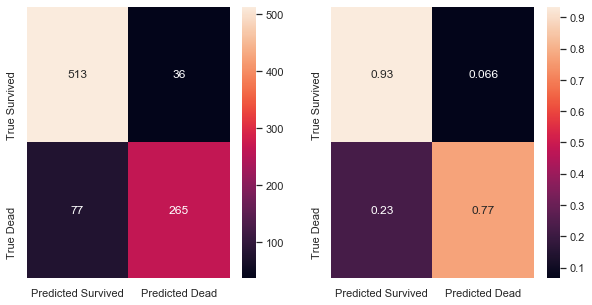

In [143]:
#figure size
plt.figure(figsize = (10,5))

#heatmap subplots

#first plot
plt.subplot(121)
sns.heatmap(cm_df, annot=True, fmt='d')

#second plot
plt.subplot(122)
sns.heatmap(cm_percent_df, annot=True)

Let's compare all the models togther with their accuracies! 

## 8. Comparing Models

In [145]:
#accuracy dataframe
mod_and_acc = {
    'MODEL': ['Logistic Regression', 'Linear Regression', 'Support Vector Machine(SVC)', 'Linear SVC', 'Random Forest',
               'Decision Tree', 'Gaussian Naive Bayes', 'k-Nearest Neighbors', 'Stochastic Gradient Descent'],
    
    'ACCURACY': [log_acc, lin_acc, svm_acc, lsvc_acc, rfc_acc, dtc_acc, gnb_acc, knn_acc, sgd_acc]
} 

models_df = pd.DataFrame(mod_and_acc)
models_df

,MODEL,ACCURACY
0,Logistic Regression,80.81
1,Linear Regression,40.11
2,Support Vector Machine(SVC),83.39
3,Linear SVC,79.91
4,Random Forest,87.32
5,Decision Tree,87.32
6,Gaussian Naive Bayes,77.67
7,k-Nearest Neighbors,78.56
8,Stochastic Gradient Descent,76.99


In [146]:
#sorting with respect to accuracy
models_df.sort_values(by='ACCURACY', ascending=False)

,MODEL,ACCURACY
4,Random Forest,87.32
5,Decision Tree,87.32
2,Support Vector Machine(SVC),83.39
0,Logistic Regression,80.81
3,Linear SVC,79.91
7,k-Nearest Neighbors,78.56
6,Gaussian Naive Bayes,77.67
8,Stochastic Gradient Descent,76.99
1,Linear Regression,40.11


As we can see the sorted accuracy dataframe, the tree models (that is, random forest and decision tree) have the exact same and high accuracy than the rest of the models. So, this means, these models can easily detect the survival data more accurately when compared.

### Submission file creation

In [148]:
#test data
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,892,3,1,2,0,2,1.0,1
1,893,3,0,2,0,0,3.0,0
2,894,2,1,3,1,2,1.0,1
3,895,3,1,1,1,0,1.0,1
4,896,3,0,1,1,0,3.0,0


In [149]:
#final data
final_data = {
    'PassengerId' : test_data['PassengerId'],
    'Survived' : rfc_y_predict
}

submission = pd.DataFrame(final_data)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [1]:
#creating the csv file to submit
#submission.to_csv('submission.csv', index=False)